## Aula 10 - Seleção de atributos e validação de modelos

### Importando as bibliotecas:
* pandas, numpy, matplotlib e seaborn
* sklearn.preprocessing (StandardScaler), sklearn.model_selection (train_test_split) e sklearn.datasets (load_wine)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [2]:
# utilizando o DataFrame load_wine, já separando o X e y
data = load_wine().data
names = load_wine().feature_names
y = load_wine().target

In [3]:
X = pd.DataFrame(data=data, columns=names)

In [4]:
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [5]:
np.shape(y)

(178,)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

## Separando em conjuntos de treino e teste (random_state=42)
## Padronizando para os conjunto de treino e teste

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_pad = scaler.fit_transform(X_train)
X_test_pad = scaler.fit_transform(X_test)

## Importando o PCA
* from sklearn.decomposition import PCA, utilizando 13 componentes principais

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=len(X.columns))

In [11]:
pca.fit(X_train_pad)

PCA(n_components=13)

In [12]:
X_train_pca = pca.transform(X_train_pad)

In [13]:
np.shape(X_train_pca)

(124, 13)

In [14]:
X_train_pca

array([[-3.00694856, -0.44098187, -0.841225  , ...,  0.092763  ,
        -0.12752086, -0.16916663],
       [ 0.47849211,  1.99040077, -0.6896192 , ...,  0.36421707,
         0.55035386, -0.11084717],
       [ 1.40660818,  0.77327604, -1.54703099, ..., -0.67773067,
        -0.2117173 ,  0.04575819],
       ...,
       [ 4.22538352, -2.40143008, -1.0453208 , ...,  0.01439273,
        -0.08514755, -0.09809057],
       [-1.75808282,  1.56188578, -0.13557016, ..., -0.8637719 ,
        -0.3434664 ,  0.29253833],
       [-0.0931339 ,  1.25456427,  0.83849232, ..., -0.35838506,
        -0.0283026 , -0.27300095]])

In [15]:
X_test_pca = pca.transform(X_test_pad)

In [16]:
var_explicada = pca.explained_variance_ratio_

In [17]:
var_explicada.sum()

1.0

## Scree Plot

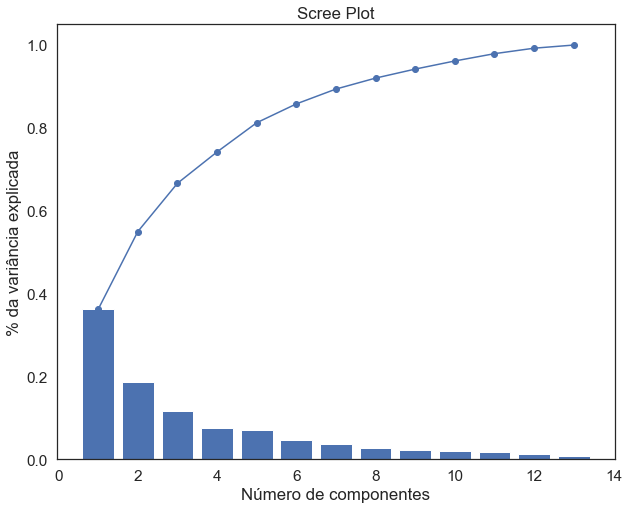

In [18]:
componentes = list(i for i in range(1,14))
plt.figure(figsize=[10, 8])
sns.set(font_scale=1.4, style='white')
plt.title('Scree Plot')
plt.xlabel('Número de componentes')
plt.ylabel('% da variância explicada')
plt.bar(componentes, var_explicada)
plt.plot(componentes, np.cumsum(var_explicada), marker='o')

## Executando o PCA agora para 2 componentes

In [19]:
pca = PCA(n_components=2)
pca.fit(X_train_pad)

PCA(n_components=2)

In [20]:
X_train_pca = pca.transform(X_train_pad)
X_test_pca = pca.transform(X_test_pad)

In [21]:
np.shape(X_train_pca)

(124, 2)

### Classificando o conjunto utilizando Redes Neurais tanto para o conjunto padronizado quanto para o construído por PCA

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [23]:
ann = MLPClassifier(max_iter=1000)

In [24]:
# Primeiro utilizando o padronizado:
ann.fit(X_train_pad, y_train)

MLPClassifier(max_iter=1000)

In [25]:
y_pred_pad = ann.predict(X_test_pad)

In [26]:
print(classification_report(y_test, y_pred_pad))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [27]:
# Primeiro utilizando o padronizado:
ann.fit(X_train_pca, y_train)

MLPClassifier(max_iter=1000)

In [28]:
y_pred_pca = ann.predict(X_test_pca)

In [29]:
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      1.00      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54



In [30]:
df_pca = pd.DataFrame(data=X_test_pca, columns=['PC1', 'PC2'])

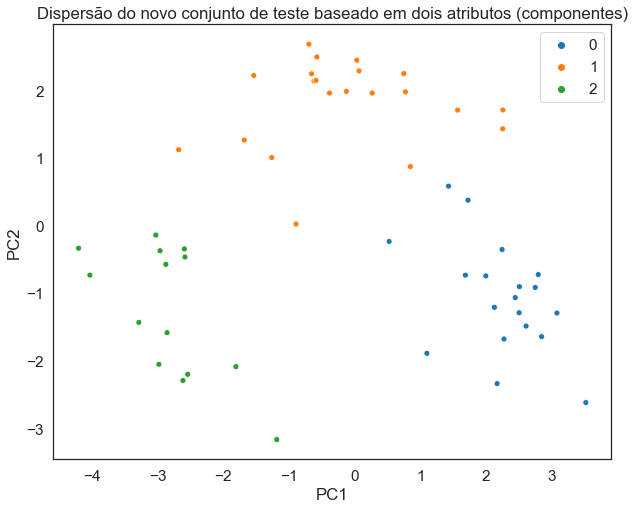

In [31]:
plt.figure(figsize=[10, 8])
plt.title('Dispersão do novo conjunto de teste baseado em dois atributos (componentes)')
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_test, palette='tab10')
plt.show()

## Utilizando Floresta Aleatória para verificação da importância dos atributos

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(n_estimators=10000)

In [34]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000)

In [35]:
rf.feature_importances_

array([0.11999571, 0.02849169, 0.01408179, 0.03817716, 0.02750153,
       0.05821217, 0.15265175, 0.00957671, 0.03168585, 0.18104137,
       0.07020934, 0.12863299, 0.13974194])

In [36]:
# Código retirado da documentação do RandomForestClassifier()
feat_labels = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range (X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                           feat_labels[f],
                           importances[indices[f]]))

 1) alcohol                        0.181041
 2) malic_acid                     0.152652
 3) ash                            0.139742
 4) alcalinity_of_ash              0.128633
 5) magnesium                      0.119996
 6) total_phenols                  0.070209
 7) flavanoids                     0.058212
 8) nonflavanoid_phenols           0.038177
 9) proanthocyanins                0.031686
10) color_intensity                0.028492
11) hue                            0.027502
12) od280/od315_of_diluted_wines   0.014082
13) proline                        0.009577


## Validação cruzada
* K-fold (estratificado) e Leave-one-out, utilizando Floresta aleatória como estimador
* from sklearn.model_selection import StratifiedKFold, LeaveOneOut

In [37]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, LeaveOneOut

In [38]:
skf = StratifiedKFold(n_splits=10)
loo = LeaveOneOut()

In [39]:
rf = RandomForestClassifier(n_estimators=100)

In [40]:
cv1 = cross_val_score(estimator=rf, X=X, y=y, cv=skf)

In [41]:
cv1

array([0.94444444, 1.        , 0.94444444, 0.94444444, 0.94444444,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [42]:
cv1.mean()

0.9777777777777779

In [43]:
cv1.std()

0.027216552697590882

In [44]:
cv2 = cross_val_score(estimator=rf, X=X, y=y, cv=loo)

In [45]:
cv2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [46]:
4/len(X)

0.02247191011235955

In [47]:
1-4/len(X)

0.9775280898876404

In [48]:
cv2.mean()

0.9775280898876404